In [ ]:
from scipy.io import arff
import urllib.request
import io

url = "http://www.ece.uah.edu/~thm0009/icsdatasets/gas_final.arff"
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC

import time

In [ ]:
df = pd.DataFrame(data)
df['result'] = df['result'].apply(lambda x: int(x.decode('utf-8')))
df

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,rate,setpoint,control_mode,control_scheme,pump,solenoid,crc_rate,measurement,time,result
0,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.106868,0
1,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.043098,0
2,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.266332,0
3,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.116280,0
4,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.257916,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97014,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.252874,1.288076,0
97015,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.275862,1.126445,0
97016,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.264368,1.251281,0
97017,4.0,4.0,183.0,233.0,9.0,18.0,3.0,10.0,3.0,10.0,...,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.287356,1.103920,0


In [ ]:
# Count the number of samples for each class
class_counts = df['result'].value_counts()

# Display the counts
print(class_counts)

0    61156
2    15466
4     7637
7     6805
1     2763
6     1837
3      782
5      573
Name: result, dtype: int64


In [ ]:
X = df.drop(columns=['result'])
y = df['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#XgBoost
start_time = time.perf_counter()
model1 = xgb.XGBClassifier(objective='multi:softmax', num_class=8, random_state=42)
model1.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")

computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")


Accuracy: 0.9924
Precison: 0.9924
Recall: 0.9924
F1_score: 0.9924
Computation time: 35.35803072899998 seconds


In [ ]:
n_classes = len(np.unique(y_test))
overall_FPR = 0

for class_of_interest in range(n_classes):
  # Create a binary confusion matrix for the chosen class versus the rest
  binary_true = [1 if label == class_of_interest else 0 for label in y_test]
  binary_pred = [1 if label == class_of_interest else 0 for label in y_pred]

  conf_matrix = confusion_matrix(binary_true, binary_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate the False Positive Rate (FPR) for the class
  class_FPR = FP / (FP + TN)

  # Weight the FPR by the class distribution
  class_weight = sum(binary_true) / len(binary_true)
  overall_FPR += class_weight * class_FPR

print(f"Overall False Positive Rate: {overall_FPR}")

Overall False Positive Rate: 0.007331612973719711


In [ ]:
from sklearn.metrics import roc_auc_score

# y_true: True class labels
# y_score: Predicted class scores

# Calculate AUC for each class
auc_scores = []
for class_index in range(8):
  auc = roc_auc_score(y_test[:, class_index], y_pred[:, class_index])
  auc_scores.append(auc)

# Calculate overall AUC score (macro-averaging)
overall_auc = sum(auc_scores) / 8

In [ ]:
#Decision Tree
start_time = time.perf_counter()
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")


Accuracy: 0.9876
Precison: 0.9876
Recall: 0.9876
F1_score: 0.9876
Computation time: 0.36130232200002865 seconds


In [ ]:
n_classes = len(np.unique(y_test))
overall_FPR = 0

for class_of_interest in range(n_classes):
  # Create a binary confusion matrix for the chosen class versus the rest
  binary_true = [1 if label == class_of_interest else 0 for label in y_test]
  binary_pred = [1 if label == class_of_interest else 0 for label in y_pred]

  conf_matrix = confusion_matrix(binary_true, binary_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate the False Positive Rate (FPR) for the class
  class_FPR = FP / (FP + TN)

  # Weight the FPR by the class distribution
  class_weight = sum(binary_true) / len(binary_true)
  overall_FPR += class_weight * class_FPR

print(f"Overall False Positive Rate: {overall_FPR}")

Overall False Positive Rate: 0.010867946389870839


In [ ]:
#Random Forest
start_time = time.perf_counter()
model3 = RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9903
Precison: 0.9903
Recall: 0.9903
F1_score: 0.9903
Computation time: 10.579946366000001 seconds


In [ ]:
n_classes = len(np.unique(y_test))
overall_FPR = 0

for class_of_interest in range(n_classes):
  # Create a binary confusion matrix for the chosen class versus the rest
  binary_true = [1 if label == class_of_interest else 0 for label in y_test]
  binary_pred = [1 if label == class_of_interest else 0 for label in y_pred]

  conf_matrix = confusion_matrix(binary_true, binary_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate the False Positive Rate (FPR) for the class
  class_FPR = FP / (FP + TN)

  # Weight the FPR by the class distribution
  class_weight = sum(binary_true) / len(binary_true)
  overall_FPR += class_weight * class_FPR

print(f"Overall False Positive Rate: {overall_FPR}")

Overall False Positive Rate: 0.00964274430157785


In [ ]:
#Bagging Classifier
start_time = time.perf_counter()
model4 = BaggingClassifier(random_state=42)
model4.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9901
Precison: 0.9900
Recall: 0.9901
F1_score: 0.9900
Computation time: 3.4371343759999604 seconds


In [ ]:
n_classes = len(np.unique(y_test))
overall_FPR = 0

for class_of_interest in range(n_classes):
  # Create a binary confusion matrix for the chosen class versus the rest
  binary_true = [1 if label == class_of_interest else 0 for label in y_test]
  binary_pred = [1 if label == class_of_interest else 0 for label in y_pred]

  conf_matrix = confusion_matrix(binary_true, binary_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate the False Positive Rate (FPR) for the class
  class_FPR = FP / (FP + TN)

  # Weight the FPR by the class distribution
  class_weight = sum(binary_true) / len(binary_true)
  overall_FPR += class_weight * class_FPR

print(f"Overall False Positive Rate: {overall_FPR}")

Overall False Positive Rate: 0.01008459203006041


In [ ]:
from sklearn.linear_model import LogisticRegression

start_time = time.perf_counter()
model5 = LogisticRegression(max_iter=1000, random_state=42, multi_class='ovr')  # 'ovr' for multiclass
model5.fit(X_train, y_train)
end_time = time.perf_counter()

y_pred = model5.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precison: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6360
Precison: 0.4045
Recall: 0.6360
F1_score: 0.4945
Computation time: 2.902272592000031 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
n_classes = len(np.unique(y_test))
overall_FPR = 0

for class_of_interest in range(n_classes):
  # Create a binary confusion matrix for the chosen class versus the rest
  binary_true = [1 if label == class_of_interest else 0 for label in y_test]
  binary_pred = [1 if label == class_of_interest else 0 for label in y_pred]

  conf_matrix = confusion_matrix(binary_true, binary_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate the False Positive Rate (FPR) for the class
  class_FPR = FP / (FP + TN)

  # Weight the FPR by the class distribution
  class_weight = sum(binary_true) / len(binary_true)
  overall_FPR += class_weight * class_FPR

print(f"Overall False Positive Rate: {overall_FPR}")

Overall False Positive Rate: 0.636002886002886


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier
start_time = time.perf_counter()
k = 5  # You can adjust the value of k
model6 = KNeighborsClassifier(n_neighbors=k)
model6.fit(X_train, y_train)
end_time = time.perf_counter()

# Make predictions on the test set
y_pred = model6.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.9926
Precison: 0.9926
Recall: 0.9926
F1_score: 0.9926
Computation time: 0.02334764400001177 seconds


In [ ]:
n_classes = len(np.unique(y_test))
overall_FPR = 0

for class_of_interest in range(n_classes):
  # Create a binary confusion matrix for the chosen class versus the rest
  binary_true = [1 if label == class_of_interest else 0 for label in y_test]
  binary_pred = [1 if label == class_of_interest else 0 for label in y_pred]

  conf_matrix = confusion_matrix(binary_true, binary_pred)

  # Extract values from the confusion matrix
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate the False Positive Rate (FPR) for the class
  class_FPR = FP / (FP + TN)

  # Weight the FPR by the class distribution
  class_weight = sum(binary_true) / len(binary_true)
  overall_FPR += class_weight * class_FPR

print(f"Overall False Positive Rate: {overall_FPR}")

Overall False Positive Rate: 0.007881879305901607


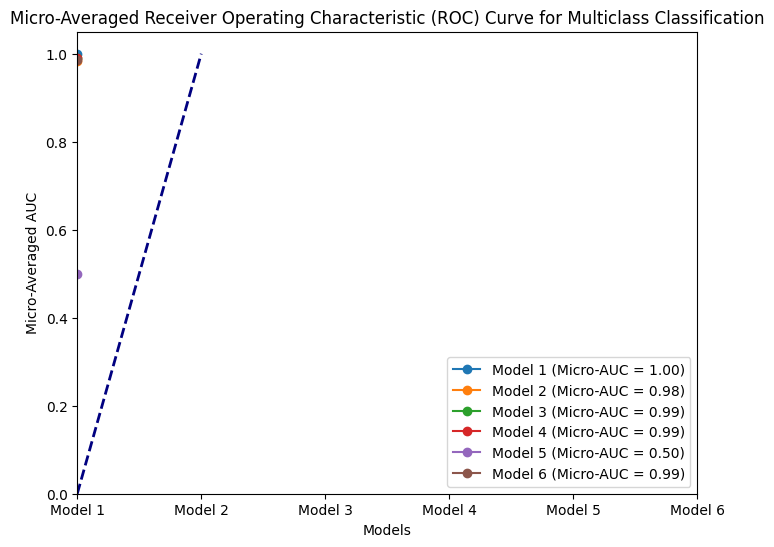

In [ ]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have a list of trained models for multiclass classification
models = [model1, model2, model3, model4, model5, model6]
plt.figure(figsize=(8, 6))

# For each model, compute and plot its micro-average AUC
for model in models:
  y_scores = model.predict_proba(X_test)
  micro_auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
  plt.plot(micro_auc, label=f'Model {models.index(model) + 1} (Micro-AUC = {micro_auc:.2f})', marker='o')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Models')
plt.ylabel('Micro-Averaged AUC')
plt.title('Micro-Averaged Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.xticks(range(len(models)), [f'Model {i+1}' for i in range(len(models))])
plt.legend(loc='lower right')
plt.show()

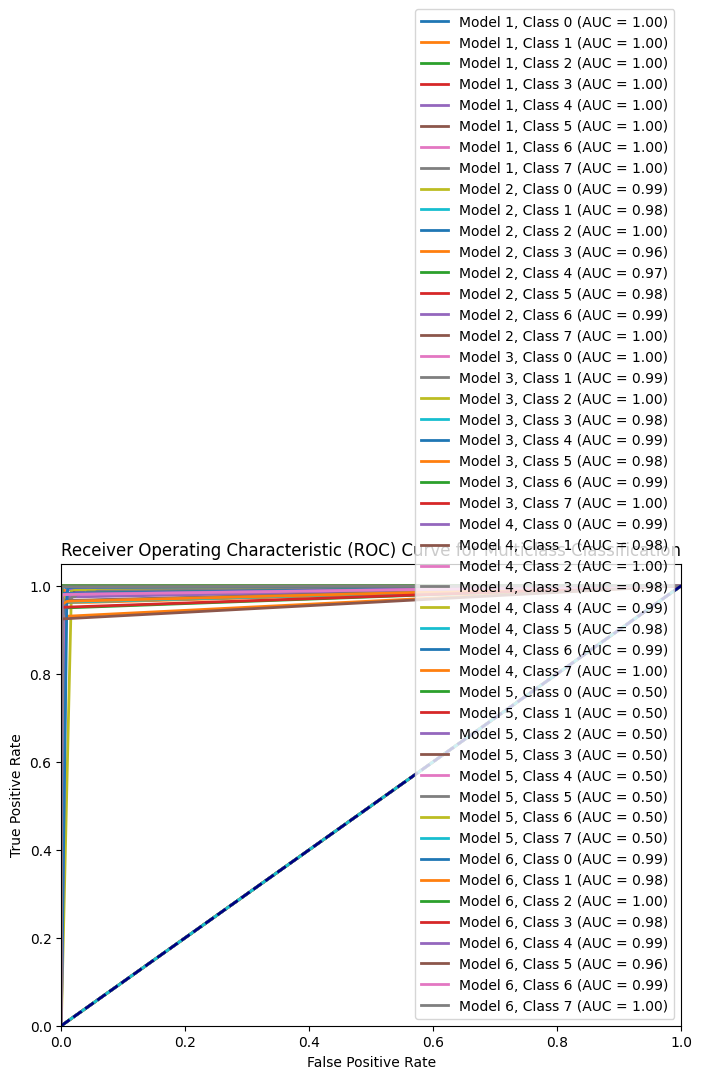

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Assuming you have a list of trained models
models = [model1, model2, model3, model4, model5, model6]  # Replace with your models

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

plt.figure(figsize=(8, 6))

# For each model, compute and plot its ROC curve for each class
for model in models:
    y_scores = model.predict_proba(X_test)

    n_classes = y_test_bin.shape[1]

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'Model {models.index(model) + 1}, Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#SVM Radial
start_time = time.perf_counter()
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

Accuracy: 0.6381
Precison: 0.4343
Recall: 0.6381
F1_score: 0.4990
Computation time: 344.397457797 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVM Polynomial
start_time = time.perf_counter()
model = SVC(kernel='poly', random_state=42)
model.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")

In [ ]:
#SVMLinear
start_time = time.perf_counter()
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
end_time = time.perf_counter()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precison: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1_score: {f1:.4f}")
computation_time = end_time - start_time
print("Computation time:", computation_time, "seconds")